In [15]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

#SCFMC3 LEADS 4+5

Leads 4 and 5 are the purple leads on the top sample. The leads are all ~40nm of Pd. This sample was made to test the connectivity of the leads to the nanotube using room temperature MIBK/IPA development and a metal known to make good nanotube contacts (Pd).

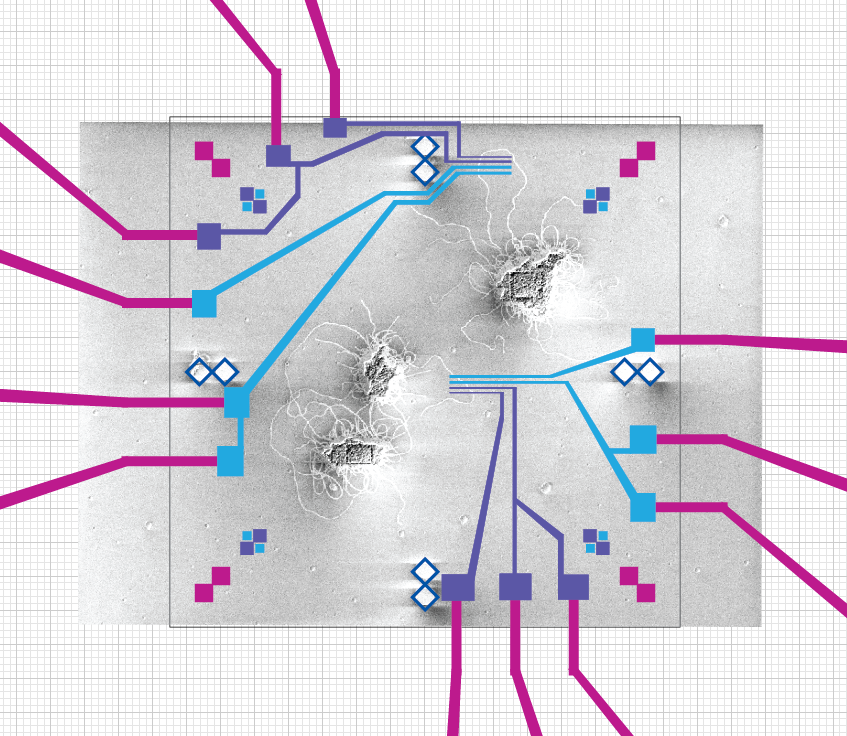

In [21]:
from IPython.display import Image

rt_dir = '/Volumes/JUPITER/Data/scfmc3/room_temp/'
cold_dir = '/Volumes/JUPITER/Data/scfmc3/4K/'
fig_dir = '/Volumes/JUPITER/Data/scfmc3/figures/'
thesis_dir = '/Users/nik/Dropbox/Repos/thesis/figures/other_devices'
Image(os.path.join(fig_dir,'scfmc3_q1.PNG'))

All of my file names will refer to what leads were connected. The general naming scheme is something like...

*measurement_high_low-gate_number.filetype*

High, low, and gate refer to the pins where the high and low bias voltage and gate voltage are connected.

This sample was mounted in the dunker. Despite the colors on the image here, all the nanotube contacts were palladium and bonding pads were Cr/Au.

## Room Temp DATA

### Gate Dependence

The measured current as a funciton of gate voltage at fixed bias. This data was taken on leads 14-11.

In [23]:
import glob
filelist = glob.glob(rt_dir+'*.bin')

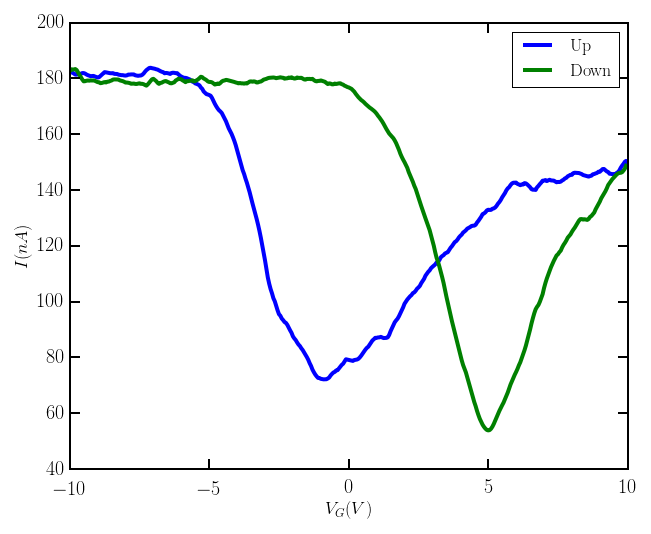

In [33]:
f = os.path.join(rt_dir, 'gateswp_4-5_20_c.bin')
df = lvdt.get_data_2d(f)
df = pd.rolling_mean(df, 5, axis=0)
df['dir'] = (df['Gate']-df['Gate'].shift()).fillna(0)
df_down = df[df['dir']<0].sort('Gate')
df_up = df[df['dir']>0].sort('Gate')

fig, ax = plt.subplots()
ax.plot(df_up['Gate'], df_up['Iavg']*1e9, label='Up')
ax.plot(df_down['Gate'], df_down['Iavg']*1e9, label='Down')
# ax.set_title('Small Band Gap Semiconductor')
ax.set_xlim(-10, 10)
ax.set_xlabel('$V_G (V)$')
ax.set_ylabel('$I (nA)$')
ax.legend()
fig.savefig(os.path.join(thesis_dir,'PdQD_RT_gateswp.pdf'))

## COOLDOWN

In [34]:
data_dir = '/Volumes/JUPITER/Data/scfmc3/'

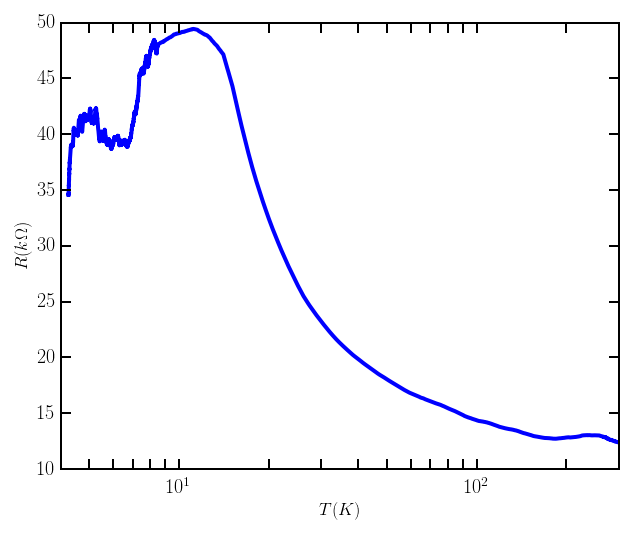

In [111]:
partone = lvdt.get_data_2d(os.path.join(data_dir,'cool-down_4-5-6_a.bin'))
parttwo = lvdt.get_data_2d(os.path.join(data_dir,'cool-down_4-5-6_b.bin'))
cooldown = pd.concat([partone[partone['T'] > 12.5], parttwo[parttwo['T'] < 8.5]]).sort('T', ascending=0)
cooldown = pd.rolling_mean(cooldown, 100)

temp = cooldown['T'].values
current = cooldown['Iavg'].values

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(temp, 1e-6/current)
ax.set_xscale('log')
ax.set_xlim(4,300)
# ax.set_title('Cool Down')
ax.set_xlabel('$T (K)$')
ax.set_ylabel('$R (k\Omega)$')
fig.savefig(os.path.join(thesis_dir, 'PdQD_cooldown.pdf'))

## 4K DATA

### Gate Dependence

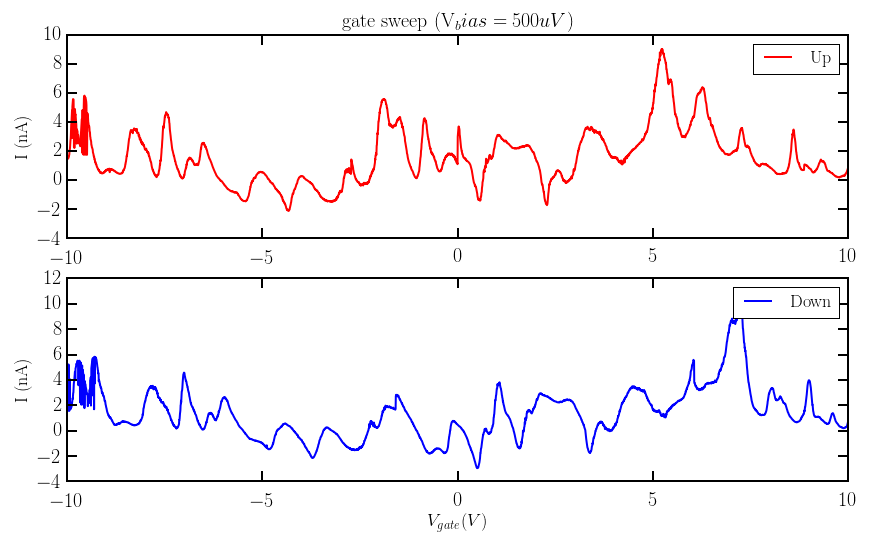

In [77]:
f = os.path.join(cold_dir,'gateswp_4-5_6_a.bin')

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Iavg']*1e9, c = 'r', lw = 2, label = 'Up')
ax1.set_xlim(-10,10)
ax1.set_title('gate sweep (V_bias = 500uV)')
ax1.set_ylabel('I (nA)')
ax1.legend()

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Iavg']*1e9, c = 'b', lw= 2, label = 'Down')
ax2.set_xlabel('$V_{gate} (V)$')
ax2.set_ylabel('I (nA)')
ax2.legend()
# fig.savefig(data_dir+'4K_gate_a'+'.png', dpi=200)

This is a definite improvement on my previous working samples. There is some hysteresis in the gate, but not a lot of random switching problems. This is due either to the lithography being cleaner, or switching to the Ithaco amplifier.

Leads 4 and 5 blew up at this point. Fuck. I need to be more careful in the winter.

#SCFMC3 LEADS 7+9

Leads 7 and 9 are the blue leads on the bottom sample. The leads are all ~40nm of Pd. This sample was made to test the connectivity of the leads to the nanotube using room temperature MIBK/IPA development and a metal known to make good nanotube contacts (Pd).

## 4K DATA

###Gate Dependence

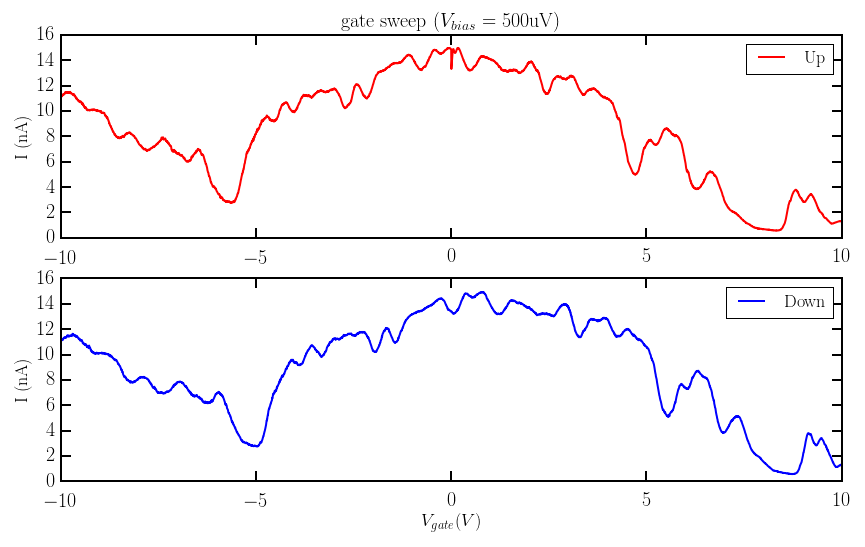

In [81]:
f = os.path.join(cold_dir, 'gateswp_7-9_6_b.bin')

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')

fig = plt.figure(figsize=(14,8))

ax1 = fig.add_subplot(2,1,1)
ax1.plot(upswp['Gate'], upswp['Iavg']*1e9, c = 'r', lw = 2, label = 'Up')
ax1.set_xlim(-10,10)
ax1.set_title('gate sweep ($V_{bias}$ = 500uV)')
ax1.set_ylabel('I (nA)')
ax1.legend()

ax2 = fig.add_subplot(2,1,2, sharex = ax1)
ax2.plot(downswp['Gate'], downswp['Iavg']*1e9, c = 'b', lw= 2, label = 'Down')
ax2.set_xlabel('$V_{gate} (V)')
ax2.set_ylabel('I (nA)')
ax2.legend()
# fig.savefig(data_dir+'4K_gate_b'+'.png', dpi=200)

This kind of looks like there will be some more coloumb blockade sort of behavior past 10V in the gate. I connected Atikur's gate amplifier to check it out. I should be able to go to +-20V now.

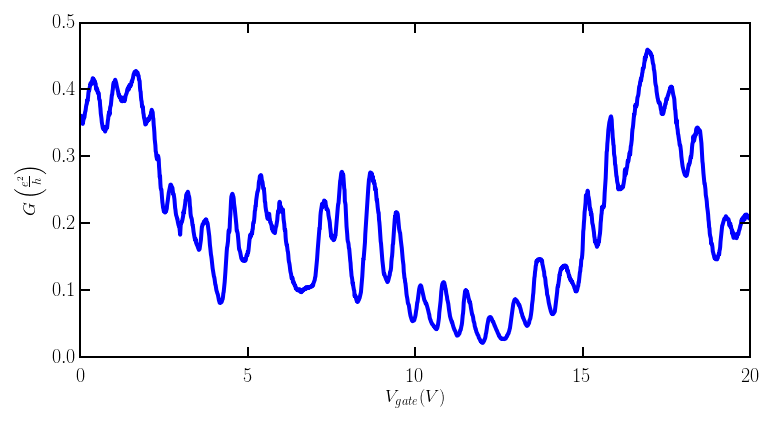

In [117]:
f = os.path.join(cold_dir,'gateswp_7-9_6_c.bin')

gateswp = lvdt.get_data_2d(f)
gateswp['dir'] = (gateswp['Gate']-gateswp['Gate'].shift()).fillna(0)
upswp = gateswp[gateswp['dir'] > 0].sort('Gate')
downswp = gateswp[gateswp['dir'] < 0].sort('Gate')
bias = 5e-4

fig, ax1 = plt.subplots(figsize = (12, 6))
ax1.plot(upswp['Gate'], upswp['Iavg']/bias/3.875e-5)
ax1.set_xlim(0,20)
ax1.set_ylabel(r'$G \left(\frac{e^2}{h}\right)$')
ax1.set_xlabel('$V_{gate} (V)$')
fig.savefig(os.path.join(thesis_dir, 'PdQD_gateswp.pdf'))

### Bias/Gate Sweep

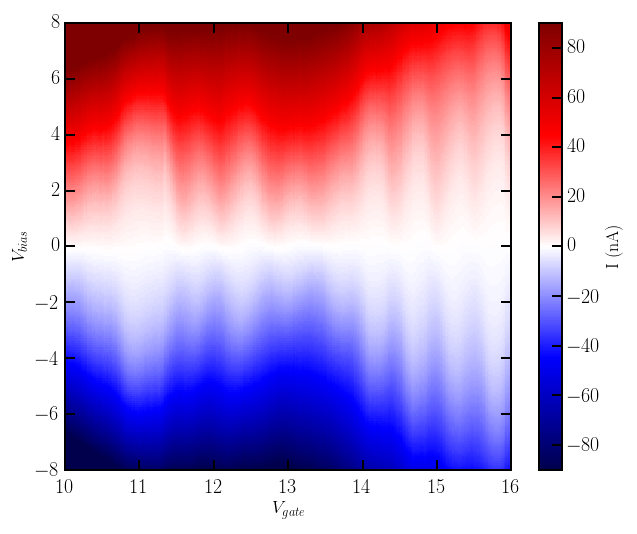

In [108]:
f = os.path.join(cold_dir, 'vi-gate_7-9_6_c.bin')

vigate = lvdt.get_data_3d(f)
vigate = vigate.groupby(vigate.index).mean()
vigate.index = vigate.index*1000

fig, ax = plt.subplots()
limits = lvdt.df_extent(vigate)
im = ax.imshow(vigate*1e9, extent = limits, 
           cmap = plt.cm.seismic, vmin = -90, vmax = 90, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel('$V_{gate}$')
ax.set_ylabel('$V_{bias}$')
cb = plt.colorbar(im)
cb.set_label('I (nA)')
# fig.savefig(data_dir+'4K_vi-gate_c'+'.png', dpi=200)

In [94]:
def get_dIdV(df, dV):
    return pd.DataFrame(np.gradient(df,dV)[0], index = df.index, columns = df.columns)

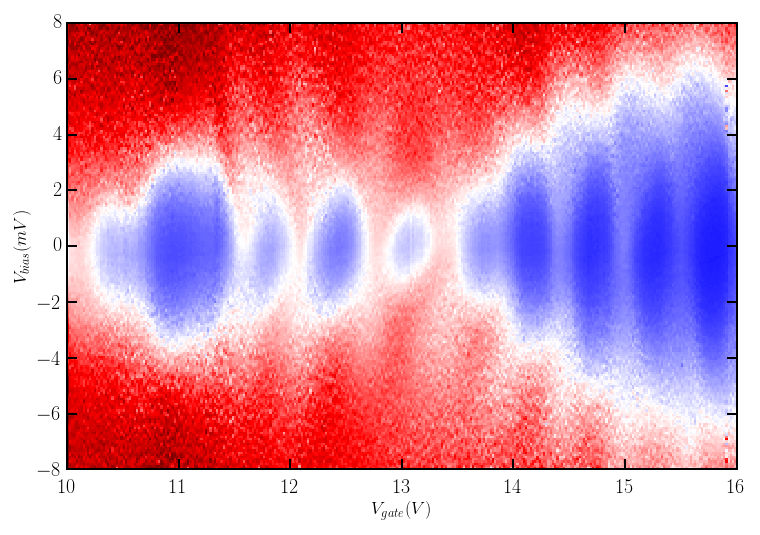

In [118]:
didv = get_dIdV(vigate, 80e-6)

fig, ax = plt.subplots(figsize = (12,8))
limits = lvdt.df_extent(didv)
im = ax.imshow(didv/3.875e-5, extent = limits, 
           cmap = plt.cm.seismic, vmin = -0.2, vmax = 0.6, 
           origin = 'lower', aspect = 'auto', interpolation = 'None')
ax.set_xlabel('$V_{gate} (V)$')
ax.set_ylabel('$V_{bias} (mV)$')
# cb = plt.colorbar(im)
# cb.set_label(r'$G \left(\frac{e^2}{h}\right)$')
fig.savefig(os.path.join(thesis_dir, 'PdQD_coulomb_diamonds.pdf'))

Not bad. Looks about right.